In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
project_path = '/content/drive/MyDrive/Fake-News-Detection/'


In [4]:
import pandas as pd

# Load fake news dataset
df_fake = pd.read_csv('/content/Fake.csv')
df_true = pd.read_csv('/content/True.csv')

# Add label column: 1 for Fake, 0 for Real
df_fake['label'] = 1
df_true['label'] = 0

# Combine into one dataframe
df = pd.concat([df_fake, df_true], ignore_index=True)

# Check first 5 rows
df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [5]:
# Dataset shape
print("Dataset shape:", df.shape)

# Columns info
df.info()

# Check missing values
print(df.isnull().sum())

# Label distribution
print(df['label'].value_counts())


Dataset shape: (44898, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
title      0
text       0
subject    0
date       0
label      0
dtype: int64
label
1    23481
0    21417
Name: count, dtype: int64


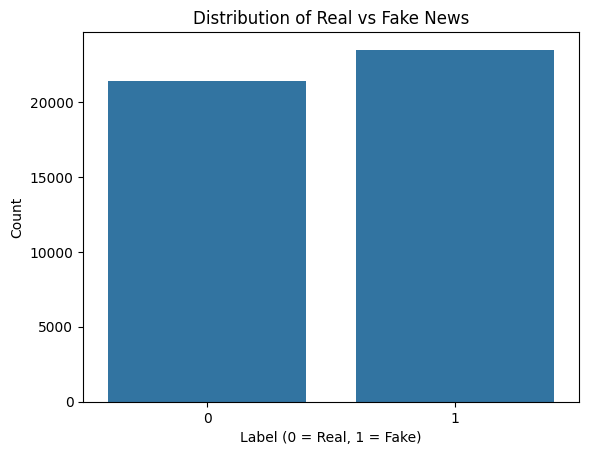

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Label (0 = Real, 1 = Fake)")
plt.ylabel("Count")
plt.show()


In [7]:
# Combine title and text into one column for NLP
df['content'] = df['title'] + " " + df['text']

# Check new column
df[['content', 'label']].head()


,content,label
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


In [8]:
df.to_csv(project_path + 'combined_fake_news.csv', index=False)


In [9]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text


In [11]:
# Create a new column with cleaned content
df['content_clean'] = df['content'].apply(clean_text)

# Check first 5 rows
df[['content', 'content_clean', 'label']].head()


,content,content_clean,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump sends embarrassing new years eve ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,drunk bragging trump staffer started russian c...,1
2,Sheriff David Clarke Becomes An Internet Joke...,sheriff david clarke becomes internet joke thr...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,trump obsessed even obamas name coded website ...,1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis called donald trump christmas spe...,1


In [12]:
# Print example before and after
print("Original:", df['content'][0])
print("Cleaned:", df['content_clean'][0])


Original:  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting l

In [13]:
df.to_csv(project_path + 'cleaned_fake_news.csv', index=False)
